In [1]:
pwd

'/Users/surajpawar/Desktop/ML_Keras_basic text classification'

In [2]:
pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Note: you may need to restart the kernel to use updated packages.


In [3]:
import re

In [4]:
import shutil

In [38]:
import os
import matplotlib.pyplot as plt
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

In [6]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

In [7]:
os.listdir(dataset_dir)

['imdbEr.txt', 'test', 'imdb.vocab', 'README', 'train']

In [8]:
train_dir = os.path.join(dataset_dir, "train")
os.listdir(train_dir)

['urls_unsup.txt',
 'neg',
 'urls_pos.txt',
 'unsup',
 'urls_neg.txt',
 'pos',
 'unsupBow.feat',
 'labeledBow.feat']

In [9]:
sample_file = os.path.join(train_dir, "pos/1181_9.txt")
with open(sample_file) as f:
    print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [11]:
remove_dir = os.path.join(train_dir, "unsup")
shutil.rmtree(remove_dir)

In [12]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    "aclImdb/train",
    batch_size = batch_size,
    validation_split = 0.2,
    subset = "training",
    seed=seed

)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [46]:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(3):
        print("review", text_batch.numpy()[i])
        print("label", label_batch.numpy()[i])

review b"My children watch the show everyday that its on. Its a great program for younger children. However they need to stop showing re-runs and do some more actual shows and get rid of Rooney's and Deedee's YELLOW TEETH. Moe is the only Doodle bop with clean white pearlie teeth and the children notice these things and ask if the 2 don't ever brush their teeth? Does the show ever make its way to the United States and if so where can we find its schedule at. And one other thing if we might be able to add. Moe you need to stop hiding so much. Sometimes when you pop up out of no where you scare the younger children and whats with the pulling of the rope? What does that signify? other then getting wet all the time. They need to add newer things to their show instead of the same ole same ole. Kids loose interest that way."
label 0
review b'I just got this video used and I was watching it last night. The acting started out extremely bad (hey------hey------twister) but got very good soon aft

2023-08-07 14:01:28.777426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20000]
	 [[{{node Placeholder/_0}}]]
2023-08-07 14:01:28.778408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20000]
	 [[{{node Placeholder/_4}}]]


In [14]:
print("label 0 corresponds to", raw_train_ds.class_names[0])
print("label 1 corresponds to", raw_train_ds.class_names[1])

label 0 corresponds to neg
label 1 corresponds to pos


In [15]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
        "aclImdb/train",
        batch_size = batch_size,
        validation_split = 0.2,
        subset = "validation",
        seed = seed
)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [16]:
raw_test_ds  = tf.keras.utils.text_dataset_from_directory(
    "aclImdb/test",
    batch_size = batch_size
)

Found 25000 files belonging to 2 classes.


In [17]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [18]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize = custom_standardization,
    max_tokens = max_features,
    output_mode = "int",
    output_sequence_length = sequence_length

)

In [19]:
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

2023-08-07 13:05:36.210389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20000]
	 [[{{node Placeholder/_4}}]]
2023-08-07 13:05:36.210790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20000]
	 [[{{node Placeholder/_0}}]]


In [22]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [23]:
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("review", first_review)
print("label", raw_train_ds.class_names[first_label])
print("vectorized review", vectorize_text(first_review, first_label))

review tf.Tensor(b'Belmondo is a tough cop. He goes after a big-time drug dealer (played by Henry Silva, normally a great villain - see "Sharky\'s Machine"; but here he is clearly dubbed, and because of that he lacks his usual charisma). He goes to the scuzziest places of Paris and Marseilles, asks for some names, beats up some people, gets the names, goes to more scuzzy places, asks for more names, beats up more people, etc. The whole movie is punch after punch after punch. It seems that the people who made it had no other ambition than to create the French equivalent of "Dirty Harry". Belmondo, who was 50 here, does perform some good stunts at the beginning; apart from those, "Le Marginal" is a violent, episodic, trite, shallow and forgettable cop movie. (*1/2)', shape=(), dtype=string)
label neg
vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[   1,    7,    4, 1233, 1021,   27,  261,  101,    4,    1, 1525,
        6992,  248,   32, 1488,    1, 1659,    4,

In [24]:
print("1287: ", vectorize_layer.get_vocabulary()[1287])
print("313: ", vectorize_layer.get_vocabulary()[313])
print("Vocabulary Size: {}".format(len(vectorize_layer.get_vocabulary())))

1287:  silent
313:  night
Vocabulary Size: 10000


In [25]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_train_ds.map(vectorize_text)
test_ds = raw_train_ds.map(vectorize_text)

In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
embedding_dim = 16

In [28]:
model = tf.keras.Sequential([
    layers.Embedding(max_features+1, embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
__________________________________________________

In [30]:
model.compile(loss = losses.BinaryCrossentropy(from_logits = True),
             optimizer = "adam",
              metrics = tf.metrics.BinaryAccuracy(threshold = 0.0)
             
             )

In [31]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10


2023-08-07 13:21:44.789777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype resource
	 [[{{node Placeholder/_17}}]]
2023-08-07 13:21:44.790495: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_18' with dtype int64
	 [[{{node Placeholder/_18}}]]


610/625 [============================>.] - ETA: 0s - loss: 0.6637 - binary_accuracy: 0.6894

2023-08-07 13:21:47.947793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_18' with dtype int64
	 [[{{node Placeholder/_18}}]]
2023-08-07 13:21:47.948280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20000]
	 [[{{node Placeholder/_0}}]]


625/625 [==============================] - 4s 6ms/step - loss: 0.6627 - binary_accuracy: 0.6913 - val_loss: 0.6078 - val_binary_accuracy: 0.7808
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5475 - binary_accuracy: 0.8014 - val_loss: 0.4845 - val_binary_accuracy: 0.8294
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4435 - binary_accuracy: 0.8433 - val_loss: 0.3996 - val_binary_accuracy: 0.8618
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3773 - binary_accuracy: 0.8665 - val_loss: 0.3469 - val_binary_accuracy: 0.8774
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3354 - binary_accuracy: 0.8795 - val_loss: 0.3115 - val_binary_accuracy: 0.8875
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3040 - binary_accuracy: 0.8890 - val_loss: 0.2843 - val_binary_accuracy: 0.8977
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0

In [34]:
loss, accuracy = model.evaluate(test_ds)

print("loss:", loss)
print("accuracy:", accuracy)

625/625 [==============================] - 1s 879us/step - loss: 0.2158 - binary_accuracy: 0.9227
loss: 0.21580520272254944
accuracy: 0.9226999878883362


In [35]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

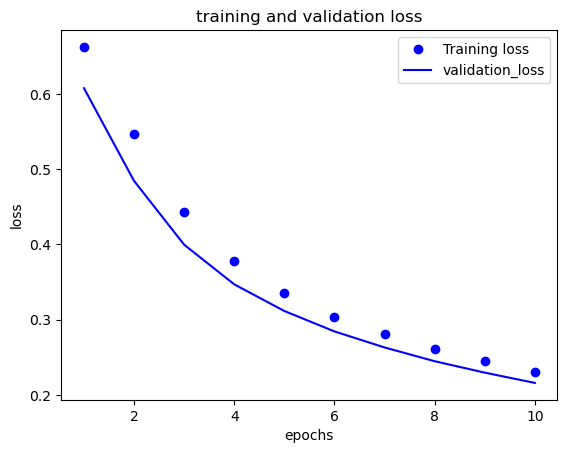

In [39]:
acc = history_dict["binary_accuracy"]
val_acc = history_dict["val_binary_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, "bo", label="Training loss")

plt.plot(epochs, val_loss, "b", label = "validation_loss")
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()



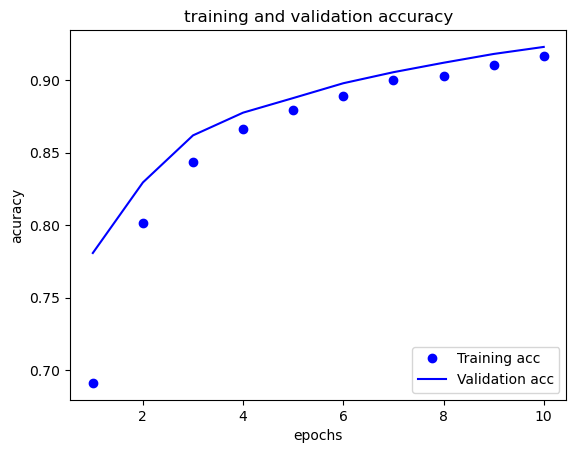

In [40]:
plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label ="Validation acc")
plt.title("training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("acuracy")
plt.legend(loc = "lower right")
plt.show()

In [41]:
export_model = tf.keras.Sequential([
    vectorize_layer,
    model,
    layers.Activation("sigmoid")
])

export_model.compile(
    loss = losses.BinaryCrossentropy(from_logits= False), optimizer = "adam", metrics = ["accuracy"]
)

loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

2023-08-07 13:34:32.310249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [25000]
	 [[{{node Placeholder/_4}}]]
2023-08-07 13:34:32.310652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [25000]
	 [[{{node Placeholder/_4}}]]


782/782 [==============================] - 3s 3ms/step - loss: 0.3096 - accuracy: 0.8738
0.8738399744033813


In [43]:
examples = [
    "the movie was great!",
    "the movie was okay.",
    "the movie was terrible..."
    
]

export_model.predict(examples)

1/1 [==============================] - 0s 135ms/step


array([[0.65467685],
       [0.48133785],
       [0.39779747]], dtype=float32)